# Car Price Predtor

> The Problem Statement Is Tat We Have To Predict The **Selling Price** Of Car Based on Features Like `Present Price`,`Kms_Driven`,`Transmission`,  `Age`,`Owner`,`Seller Type`,`Fuel Type`   

## Importing Standard Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings

In [3]:
warnings.filterwarnings("ignore")

## Importing Dataset

In [4]:
Car_df=pd.read_csv("./data/car data.xls")
Car_df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


### Checking Corelations

In [5]:
Car_df.corr(numeric_only=True)["Selling_Price"]

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
Name: Selling_Price, dtype: float64

In [6]:
Car_df["Owner"].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [7]:
Car_df.shape

(301, 9)

In [8]:
Car_df=Car_df[Car_df["Owner"]!=3]

In [9]:
Car_df.shape

(300, 9)

In [10]:
Car_df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


### Checking Unique Values

In [11]:
for i in Car_df.columns:
    if len(Car_df[i].unique())<=10:
        print(Car_df[i].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1]


In [12]:
Car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       300 non-null    object 
 1   Year           300 non-null    int64  
 2   Selling_Price  300 non-null    float64
 3   Present_Price  300 non-null    float64
 4   Kms_Driven     300 non-null    int64  
 5   Fuel_Type      300 non-null    object 
 6   Seller_Type    300 non-null    object 
 7   Transmission   300 non-null    object 
 8   Owner          300 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [13]:
Car_df["Transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [14]:
sns.set_palette("Set3")
sns.set(rc={'font.size': 12})


### Getting Cout Plot For Columns

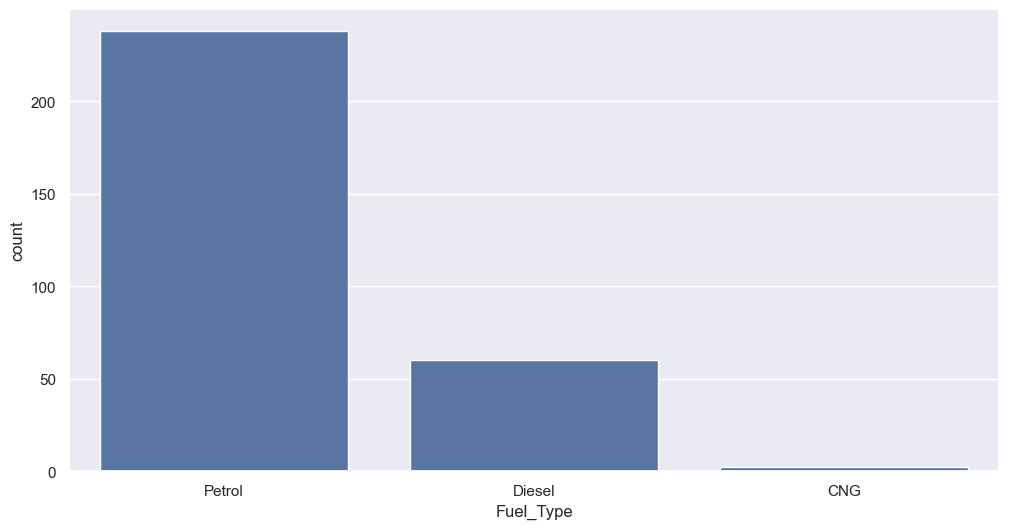

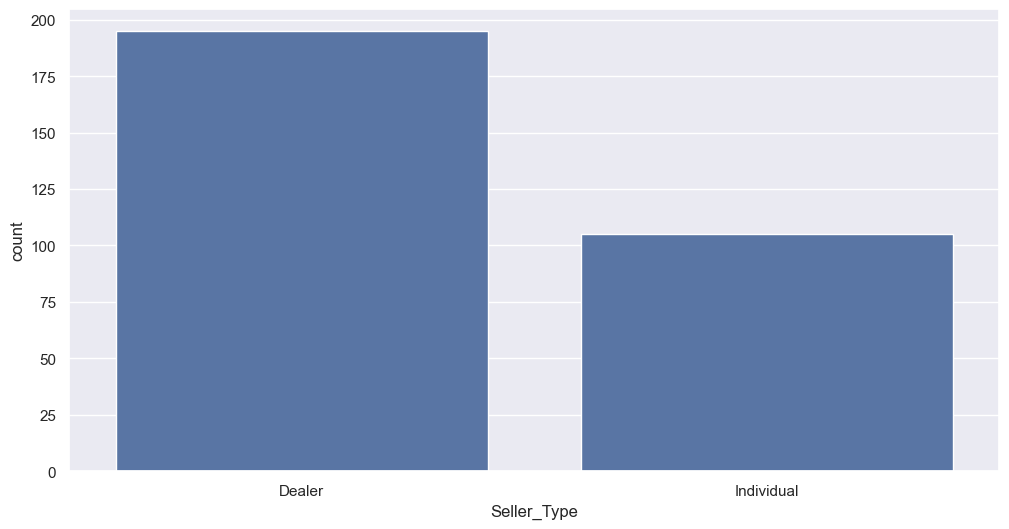

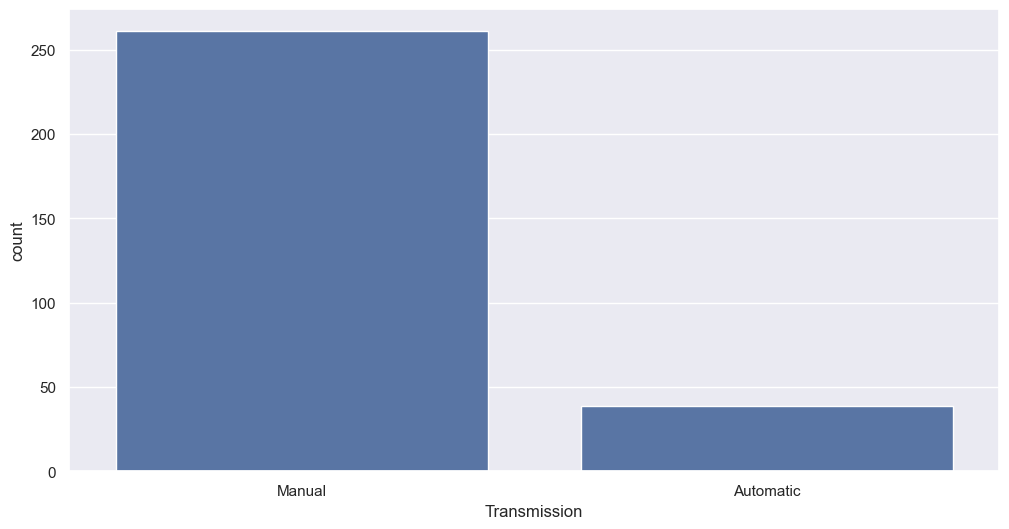

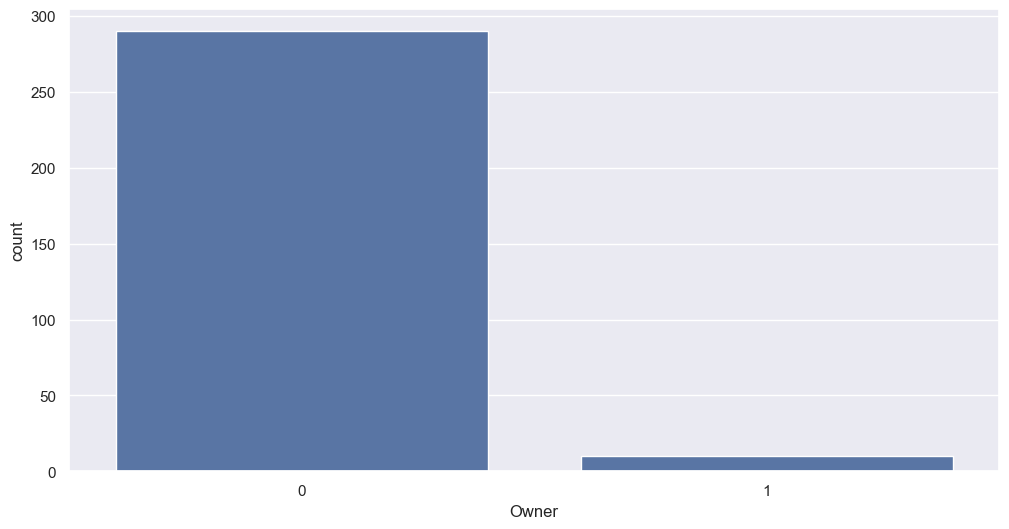

In [15]:
for i in Car_df.columns:
    if len(Car_df[i].unique())<=10:
        plt.figure(figsize=(12,6))
        sns.countplot(x=Car_df[i])
        plt.show()

In [16]:
car_df_stats=Car_df.describe()

In [17]:
car_df_stats=car_df_stats.transpose()

### Describing The Data

In [18]:
car_df_stats

,count,mean,std,min,25%,50%,75%,max
Year,300.0,2013.653333,2.862482,2003.00,2012.000,2014.000,2016.0000,2018.0
Selling_Price,300.0,4.668500,5.089765,0.10,0.875,3.625,6.0000,35.0
Present_Price,300.0,7.574800,8.608174,0.32,1.200,6.250,9.8625,92.6
Kms_Driven,300.0,36597.030000,38473.551916,500.00,15000.000,32000.000,48191.7500,500000.0
Owner,300.0,0.033333,0.179805,0.00,0.000,0.000,0.0000,1.0


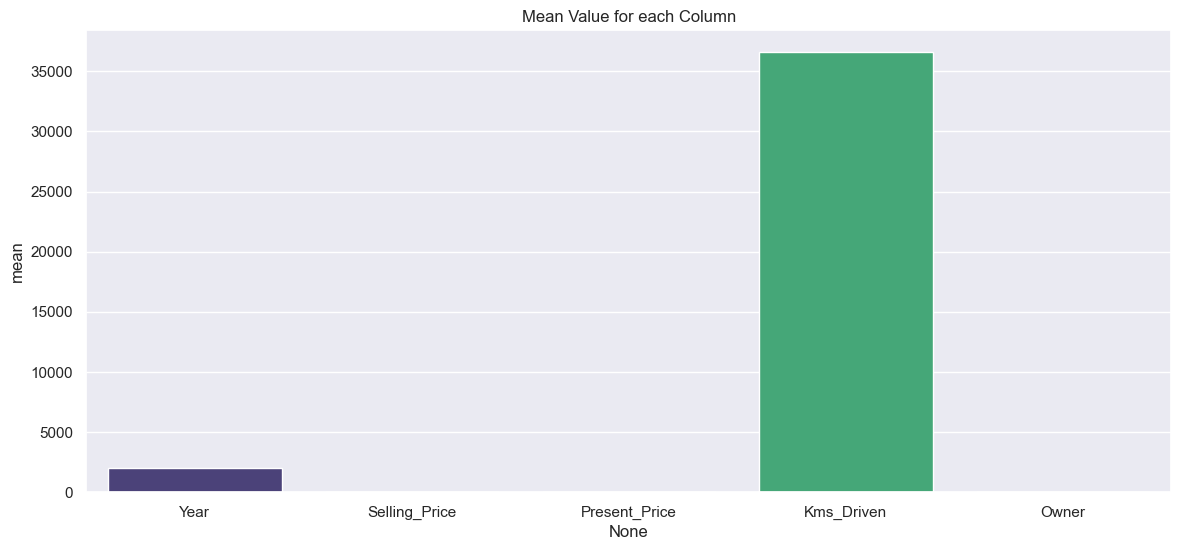

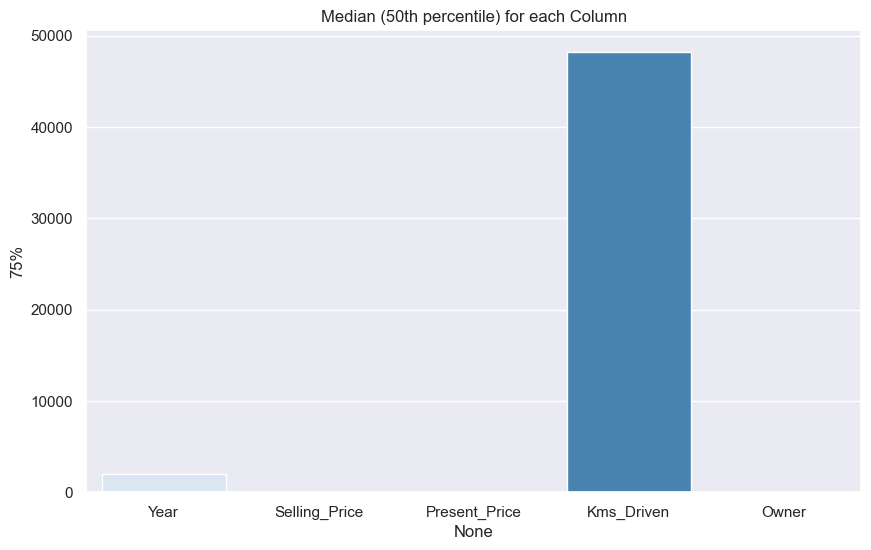

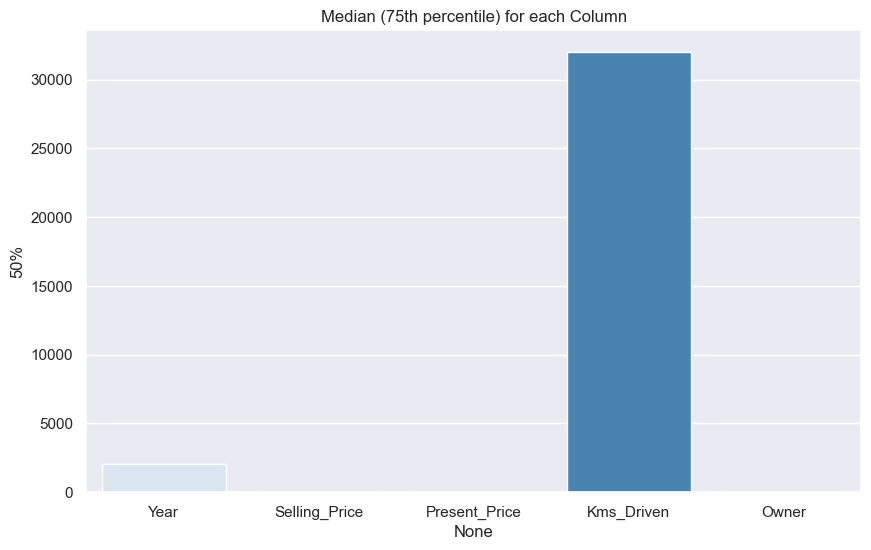

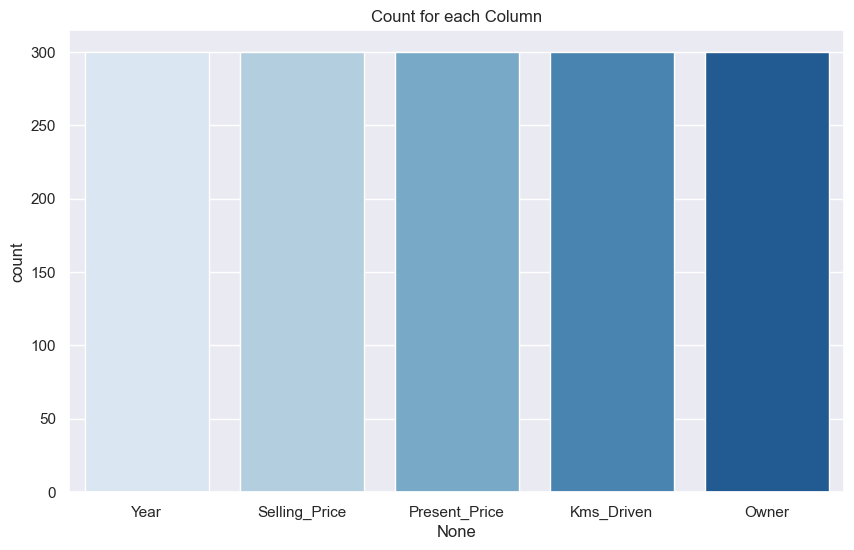

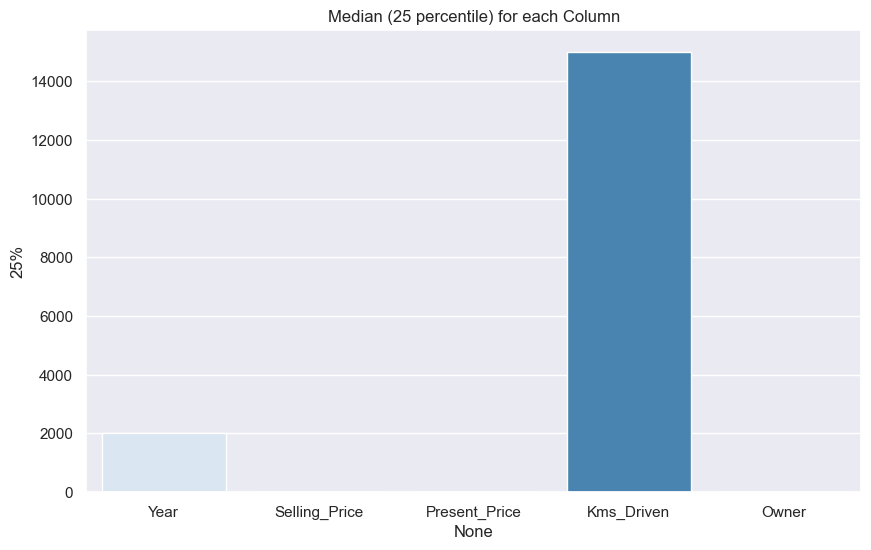

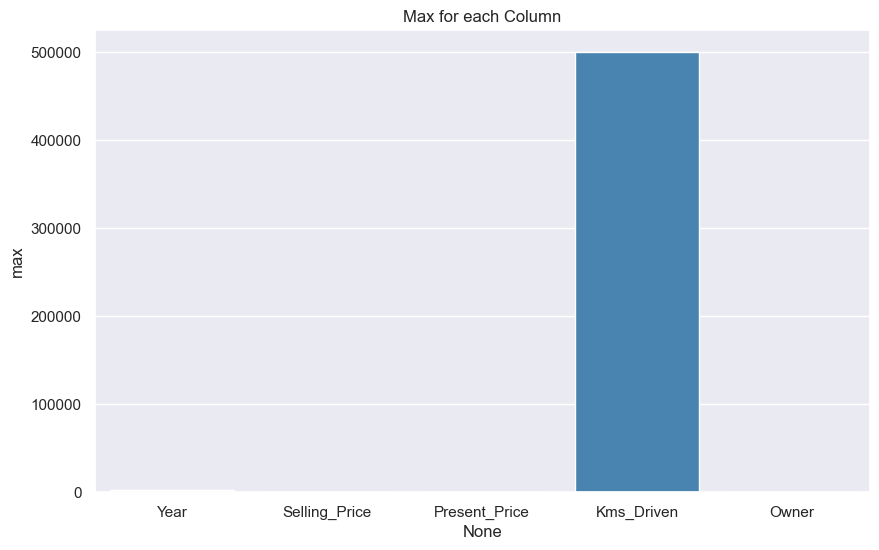

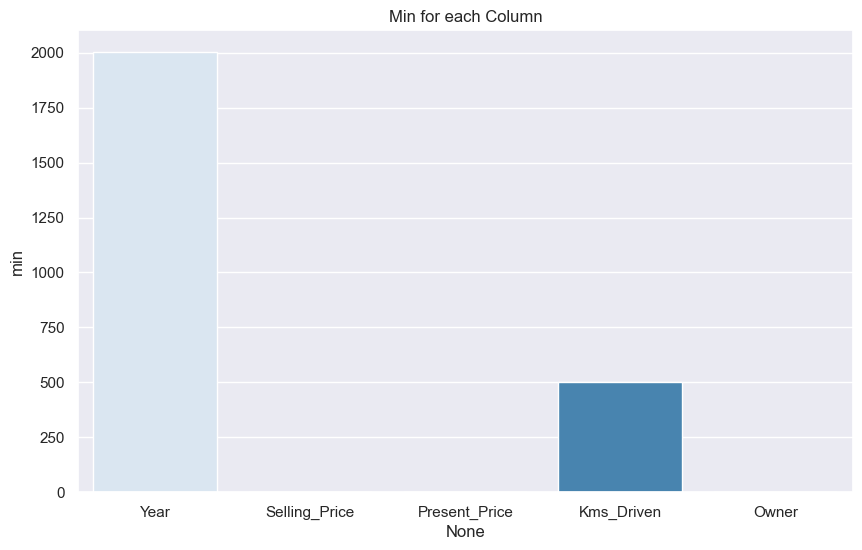

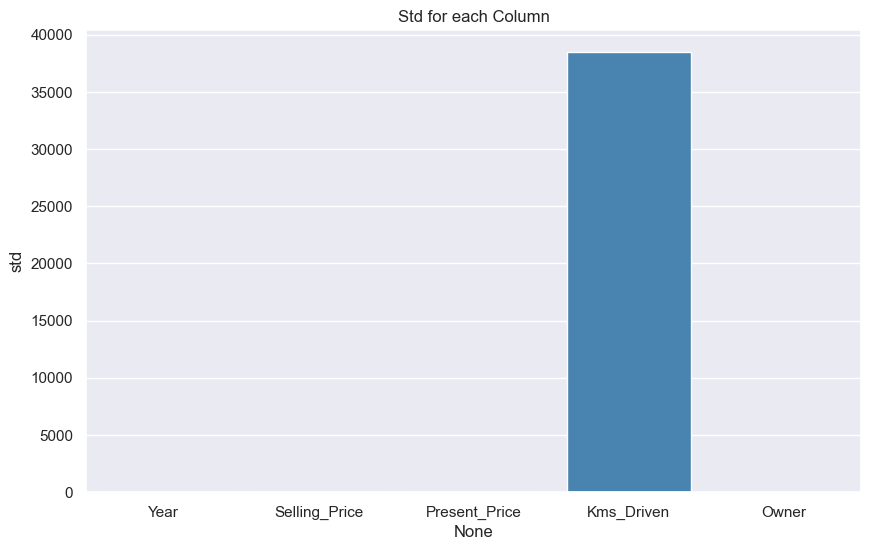

In [19]:
plt.figure(figsize=(14, 6))

# Using barplot
sns.barplot(x=car_df_stats.index, y='mean', data=car_df_stats, palette='viridis')
plt.title('Mean Value for each Column')
plt.show()

# Using boxplot
plt.figure(figsize=(10, 6))
sns.barplot(x=car_df_stats.index, y='75%', data=car_df_stats, palette='Blues')
plt.title('Median (50th percentile) for each Column')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=car_df_stats.index, y='50%', data=car_df_stats, palette='Blues')
plt.title('Median (75th percentile) for each Column')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=car_df_stats.index, y='count', data=car_df_stats, palette='Blues')
plt.title('Count for each Column')
plt.show()



plt.figure(figsize=(10, 6))
sns.barplot(x=car_df_stats.index, y='25%', data=car_df_stats, palette='Blues')
plt.title('Median (25 percentile) for each Column')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x=car_df_stats.index, y='max', data=car_df_stats, palette='Blues')
plt.title('Max for each Column')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=car_df_stats.index, y='min', data=car_df_stats, palette='Blues')
plt.title('Min for each Column')
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x=car_df_stats.index, y='std', data=car_df_stats, palette='Blues')
plt.title('Std for each Column')
plt.show()

### Checking Null Values

In [20]:
Car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### Converting Into Age Column

In [21]:
import datetime

In [22]:
date_time=datetime.datetime.now()

In [23]:
Car_df["Age"]=date_time.year-Car_df["Year"]

In [24]:
Car_df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11


In [25]:
Car_df.drop("Year",axis=1,inplace=True)

In [26]:
Car_df.head(2)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11


In [27]:
Car_df["Seller_Type"].value_counts()

Seller_Type
Dealer        195
Individual    105
Name: count, dtype: int64

### **Selling Price**

<Axes: xlabel='Selling_Price'>

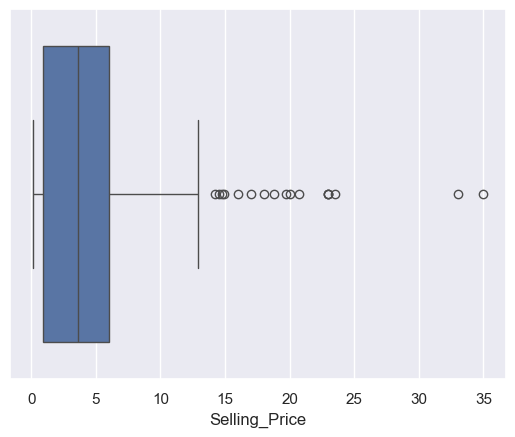

In [28]:
sns.boxplot(x=Car_df["Selling_Price"])

<Axes: xlabel='Selling_Price', ylabel='Count'>

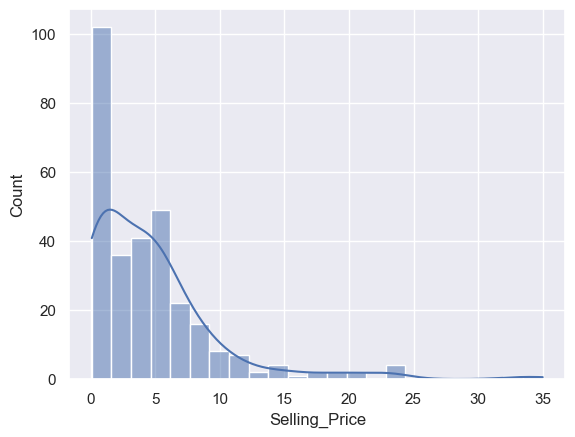

In [29]:
sns.histplot(Car_df["Selling_Price"],kde=True)

In [30]:
sorted(Car_df["Selling_Price"],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [31]:
Car_df=Car_df[~(Car_df["Selling_Price"]>=33.0) & (Car_df["Selling_Price"]<=35.0)]

<Axes: >

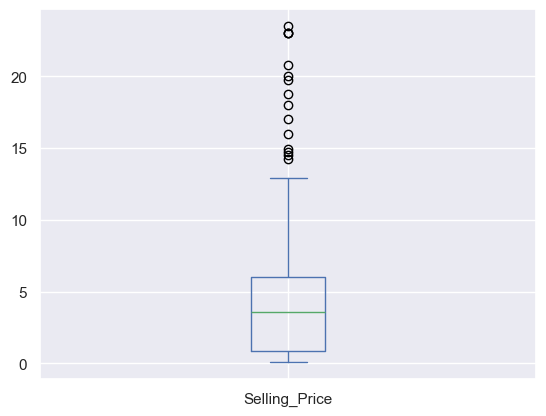

In [32]:
Car_df["Selling_Price"].plot(kind="box")

In [33]:
Car_df.shape

(298, 9)

In [34]:
Car_df.columns

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Age'],
      dtype='object')

### **Km Diven**

<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

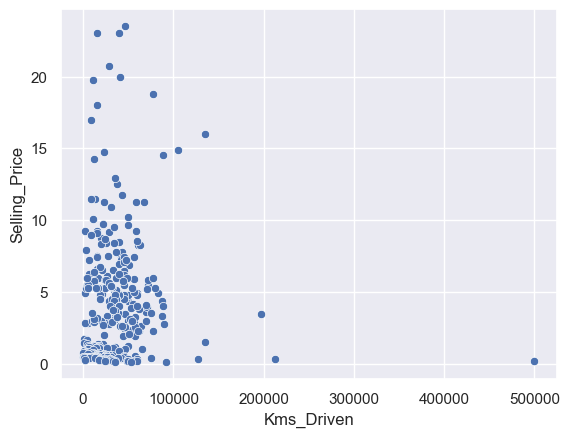

In [35]:
sns.scatterplot(x=Car_df["Kms_Driven"],y=Car_df["Selling_Price"])

In [36]:
sorted(Car_df["Kms_Driven"],reverse=True)

[500000,
 213000,
 197176,
 135154,
 135000,
 127000,
 104707,
 92233,
 90000,
 89000,
 89000,
 88000,
 87934,
 83000,
 80000,
 78000,
 77632,
 77427,
 75000,
 75000,
 72000,
 72000,
 71000,
 71000,
 70000,
 69562,
 69341,
 68000,
 65000,
 64532,
 63000,
 62000,
 62000,
 61381,
 61203,
 60241,
 60076,
 60000,
 60000,
 60000,
 60000,
 59000,
 58242,
 58000,
 58000,
 58000,
 57000,
 56879,
 56701,
 56001,
 56000,
 55138,
 55000,
 54242,
 54200,
 53675,
 53460,
 53000,
 53000,
 52132,
 51439,
 51000,
 50456,
 50024,
 50000,
 50000,
 50000,
 50000,
 50000,
 49998,
 49562,
 49000,
 49000,
 48767,
 48000,
 47000,
 47000,
 46706,
 46500,
 45780,
 45280,
 45078,
 45000,
 45000,
 45000,
 45000,
 45000,
 45000,
 45000,
 45000,
 45000,
 44542,
 44000,
 43535,
 43000,
 43000,
 43000,
 43000,
 42450,
 42367,
 42000,
 41678,
 41442,
 41000,
 40588,
 40534,
 40324,
 40126,
 40026,
 40023,
 40001,
 40000,
 40000,
 40000,
 40000,
 40000,
 39485,
 39000,
 38600,
 38488,
 38000,
 38000,
 37000,
 36198,
 

In [37]:
Car_df=Car_df[~(Car_df["Kms_Driven"]>=490000) & (Car_df["Kms_Driven"]<=500000)]

In [38]:
Car_df.shape

(297, 9)

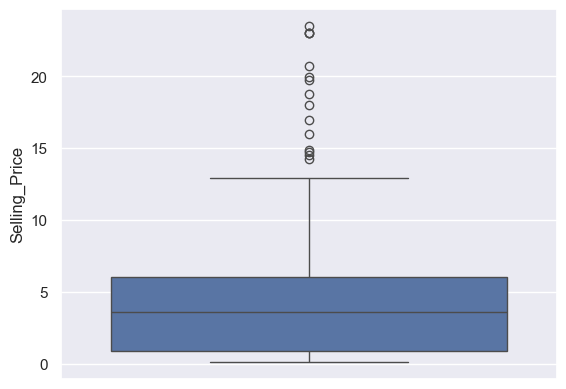

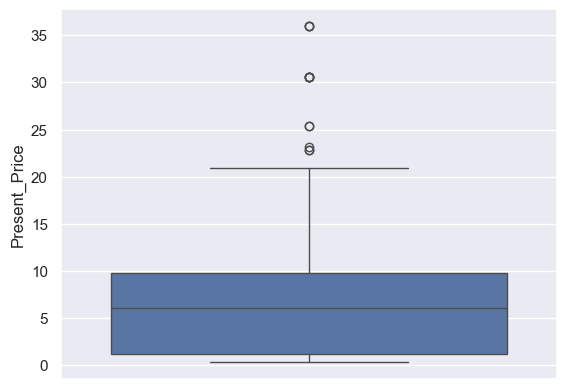

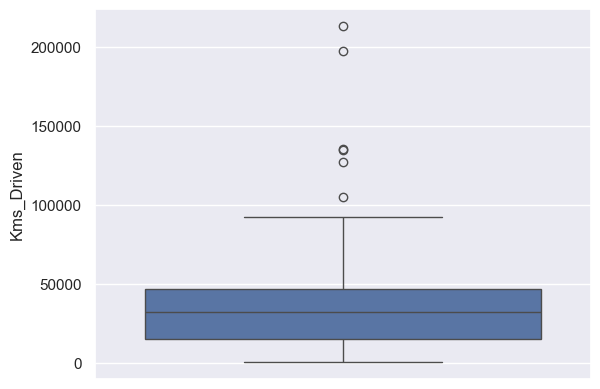

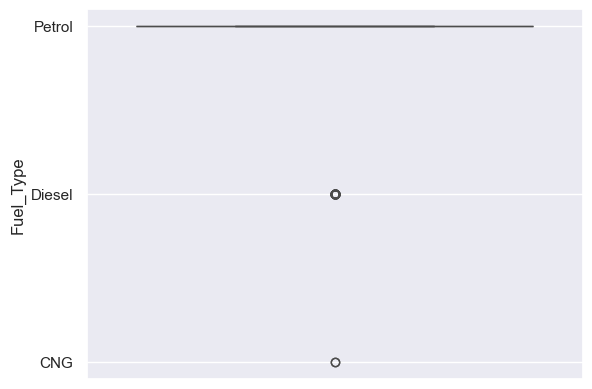

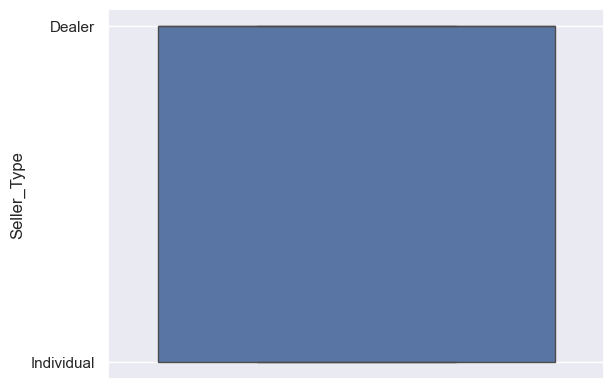

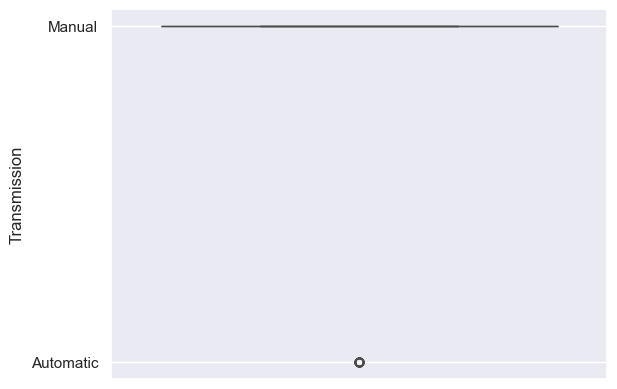

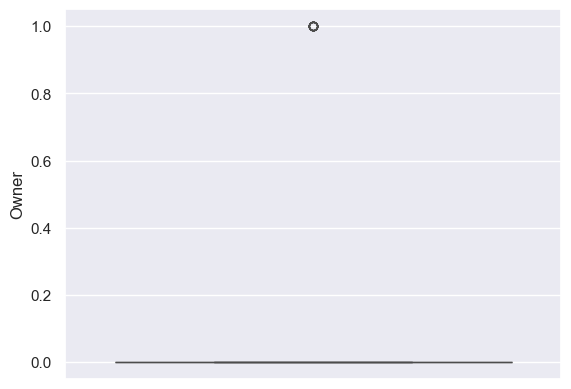

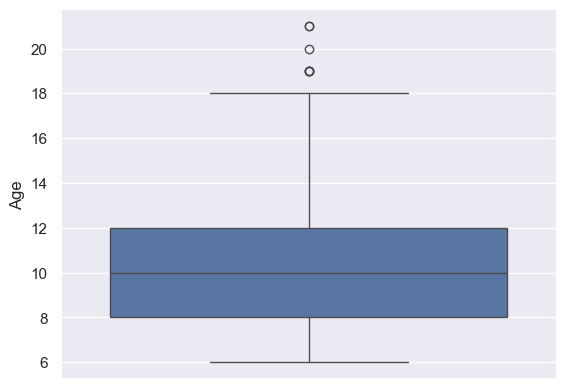

In [39]:
for i in Car_df.columns:
    if i!="Car_Name":
        sns.boxplot(Car_df[i])
        plt.show()


In [40]:
Car_df_Copy=Car_df.copy()

In [41]:
Car_df_Copy.head(2)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11


In [42]:
Car_df_Copy.shape

(297, 9)

In [43]:
Car_df_Copy=Car_df_Copy.drop(columns=["Car_Name"],axis=1)

In [44]:
Car_df_Copy.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11


In [45]:
Car_df_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Selling_Price  297 non-null    float64
 1   Present_Price  297 non-null    float64
 2   Kms_Driven     297 non-null    int64  
 3   Fuel_Type      297 non-null    object 
 4   Seller_Type    297 non-null    object 
 5   Transmission   297 non-null    object 
 6   Owner          297 non-null    int64  
 7   Age            297 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 20.9+ KB


### **Hist Plots For Various Columns**

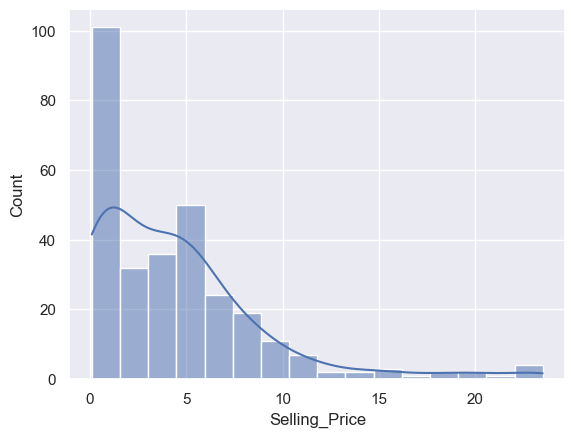

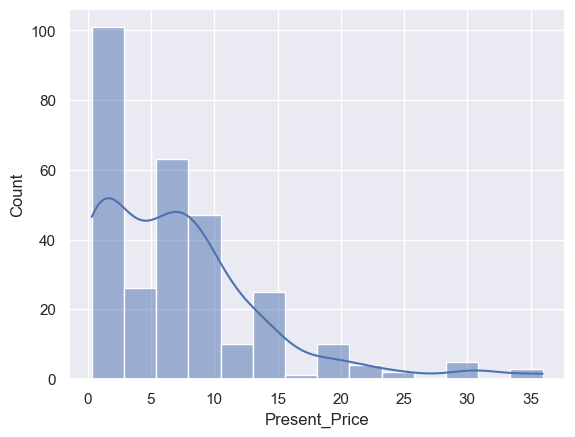

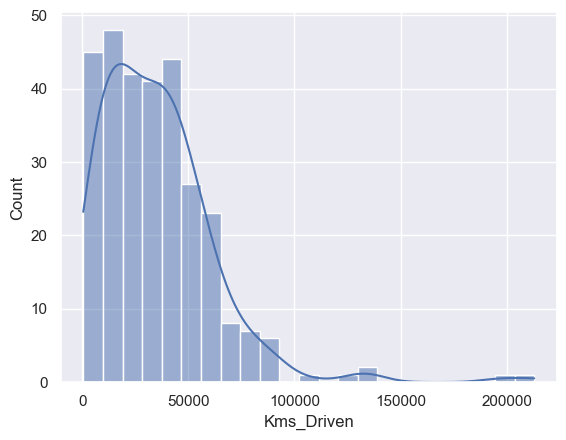

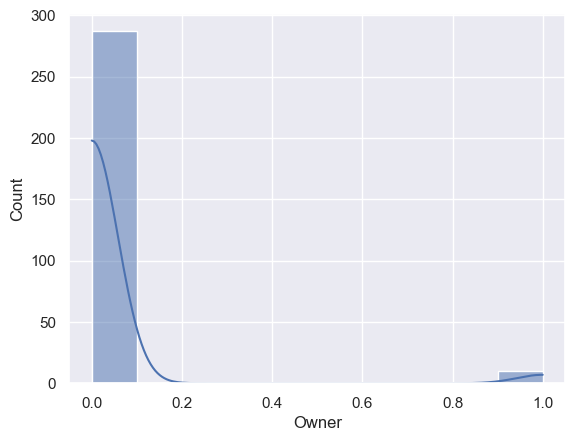

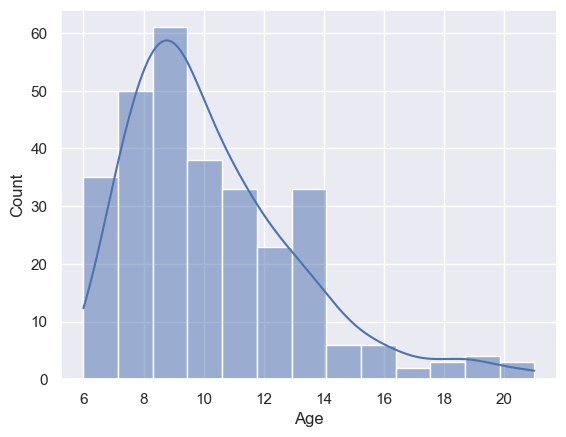

In [46]:
for i in Car_df_Copy.columns:
    if Car_df_Copy[i].dtype!="O":
        sns.histplot(Car_df_Copy[i],kde=True)
        plt.show()


### **Count Plot For Various Columns**

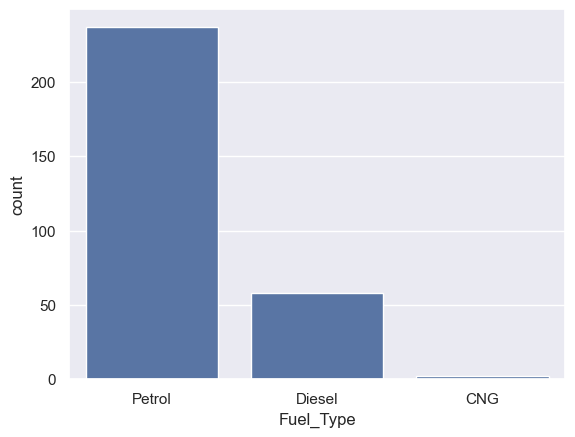

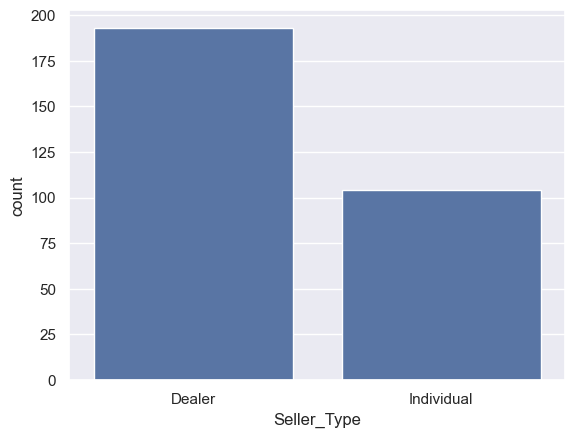

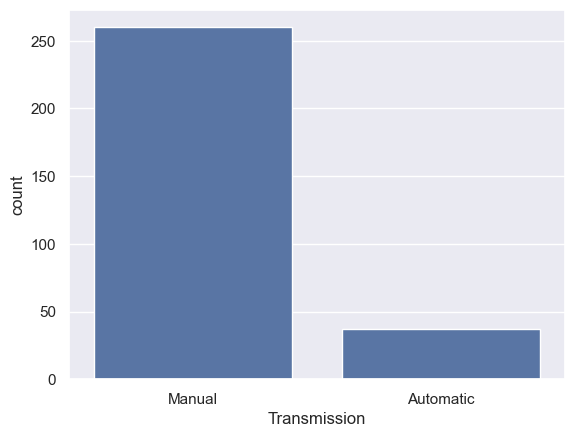

In [47]:
for i in Car_df_Copy.columns:
    if Car_df_Copy[i].dtype=="O":
        sns.countplot(x=Car_df_Copy[i])
        plt.show()


In [48]:
for i in Car_df_Copy.columns:
    if Car_df_Copy[i].dtype=="O":
        print(Car_df_Copy[i].unique())


['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


### Converting Numerical Into Categorical Columns

In [49]:
Car_df_Copy["Fuel_Type"]=Car_df_Copy["Fuel_Type"].map({"Petrol":0,"Diesel":1,"CNG":2})

In [50]:
Car_df_Copy["Seller_Type"]=Car_df_Copy["Seller_Type"].map({"Dealer":0,"Individual":1})

In [51]:
Car_df_Copy["Fuel_Type"].unique()

array([0, 1, 2], dtype=int64)

In [52]:
Car_df_Copy["Transmission"]=Car_df_Copy["Transmission"].map({"Manual":0,"Automatic":1})

In [53]:
Car_df_Copy['Transmission'].unique()

array([0, 1], dtype=int64)

In [54]:
Car_df_Copy.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,0,0,0,0,10
1,4.75,9.54,43000,1,0,0,0,11


### Splitting The Dataset

In [55]:
X=Car_df_Copy.drop("Selling_Price",axis=1)
y=Car_df_Copy["Selling_Price"]

In [56]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,5.59,27000,0,0,0,0,10
1,9.54,43000,1,0,0,0,11
2,9.85,6900,0,0,0,0,7
3,4.15,5200,0,0,0,0,13
4,6.87,42450,1,0,0,0,10


### Dividing into `Train` and `Test`

In [57]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.19,random_state=32)


In [58]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((240, 7), (57, 7), (57,), (240,))

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [61]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [62]:
from sklearn.compose import ColumnTransformer

In [63]:
X_train.columns

Index(['Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner', 'Age'],
      dtype='object')

### Choosing Numerical Columns For Satndard Scaling

In [64]:
num_cols=["Present_Price","Kms_Driven","Age"]

### **Creating Pipeline For Model Traing**

In [65]:
def model_trainer(model,X_train,X_test,y_train,y_test,name):
    model_Pipeline=Pipeline(steps=[("standardScalar",ColumnTransformer(transformers=[
                                   ("Standard_Scalar",StandardScaler(),num_cols)
                                  ],remainder='passthrough')),
                               ("Model_Trainer",model())
                                  ]
                            )
    
    model_Pipeline.fit(X_train,y_train)
    preds=model_Pipeline.predict(X_test)
    r2_model_score=r2_score(y_test,preds)
    mse_model_score=mean_squared_error(y_test,preds)
    mae_model_score=mean_absolute_error(y_test,preds)
    ans_dict={
        "model_name":name,
        "r2_score":r2_model_score,
        "mse_score":mse_model_score,
        "mae_score":mae_model_score,
    }
    return ans_dict




In [66]:
linear_red_dict=model_trainer(LinearRegression,X_train,X_test,y_train,y_test,"Linear Regression")

In [67]:
kneighbordict=model_trainer(KNeighborsRegressor,X_train,X_test,y_train,y_test,"K Neighbors Regressor")

In [68]:
xgb_dict=model_trainer(XGBRegressor,X_train,X_test,y_train,y_test,"XGB Regressor")

In [69]:
rfc_dict=model_trainer(RandomForestRegressor,X_train,X_test,y_train,y_test,"Random Forest Regressor")

In [70]:
gbc_dict=model_trainer(GradientBoostingRegressor,X_train,X_test,y_train,y_test,"Gradient Boosting Regressor")

In [71]:
abr_dict=model_trainer(AdaBoostRegressor,X_train,X_test,y_train,y_test,"Adaboost Regressor")

In [72]:
mlp_dict=model_trainer(MLPRegressor,X_train,X_test,y_train,y_test,"MLP Regressor")

In [73]:
ridge_dict=model_trainer(Ridge,X_train,X_test,y_train,y_test,"Ridge Regressor")

In [74]:
lasso_dict=model_trainer(Lasso,X_train,X_test,y_train,y_test,"Lasso Regressor")

In [75]:
dtr_dict=model_trainer(DecisionTreeRegressor,X_train,X_test,y_train,y_test,"Decision Tree Regressor")

In [76]:
svr_dict=model_trainer(SVR,X_train,X_test,y_train,y_test,"SVR Regressor")

In [77]:
etc_dict=model_trainer(ExtraTreesRegressor,X_train,X_test,y_train,y_test,"Extra Trees Regressor")

In [78]:
etc_dict

{'model_name': 'Extra Trees Regressor',
 'r2_score': 0.958984929254748,
 'mse_score': 0.35146331701754374,
 'mae_score': 0.3695421052631573}

In [79]:
data_df=[etc_dict,svr_dict,rfc_dict,xgb_dict,mlp_dict,lasso_dict,ridge_dict,linear_red_dict,kneighbordict,abr_dict,gbc_dict,dtr_dict]

### Data Df is dataframe  for Differnt Model and their Scores

In [80]:
data_df

[{'model_name': 'Extra Trees Regressor',
  'r2_score': 0.958984929254748,
  'mse_score': 0.35146331701754374,
  'mae_score': 0.3695421052631573},
 {'model_name': 'SVR Regressor',
  'r2_score': 0.9497669455268022,
  'mse_score': 0.43045338282433243,
  'mae_score': 0.43423689879999505},
 {'model_name': 'Random Forest Regressor',
  'r2_score': 0.963526106847968,
  'mse_score': 0.31254939315789454,
  'mae_score': 0.3555596491228069},
 {'model_name': 'XGB Regressor',
  'r2_score': 0.9568615219934101,
  'mse_score': 0.3696590617983894,
  'mae_score': 0.37037761020032983},
 {'model_name': 'MLP Regressor',
  'r2_score': 0.9117545157008529,
  'mse_score': 0.7561866908930827,
  'mae_score': 0.60790303456647},
 {'model_name': 'Lasso Regressor',
  'r2_score': 0.7303353969249164,
  'mse_score': 2.310790013447917,
  'mae_score': 1.255708511592608},
 {'model_name': 'Ridge Regressor',
  'r2_score': 0.8181696945244404,
  'mse_score': 1.5581268332726537,
  'mae_score': 0.8879014334975905},
 {'model_name

In [81]:
len(data_df)

12

In [82]:
data_df=pd.DataFrame(data_df)

In [83]:
data_df.head(2)

,model_name,r2_score,mse_score,mae_score
0,Extra Trees Regressor,0.958985,0.351463,0.369542
1,SVR Regressor,0.949767,0.430453,0.434237


In [84]:
data_df.sort_values(by='r2_score', ascending=False,ignore_index=True,inplace=True)

In [85]:
data_df

,model_name,r2_score,mse_score,mae_score
0,Random Forest Regressor,0.963526,0.312549,0.355560
1,Gradient Boosting Regressor,0.963079,0.316379,0.369504
2,Extra Trees Regressor,0.958985,0.351463,0.369542
3,XGB Regressor,0.956862,0.369659,0.370378
4,SVR Regressor,0.949767,0.430453,0.434237
5,Adaboost Regressor,0.923389,0.656490,0.684328
6,K Neighbors Regressor,0.920276,0.683166,0.578140
7,Decision Tree Regressor,0.918248,0.700540,0.486316
8,MLP Regressor,0.911755,0.756187,0.607903
9,Ridge Regressor,0.818170,1.558127,0.887901


### Comparing `r2_score` , `mae` and `mse` scores for different models

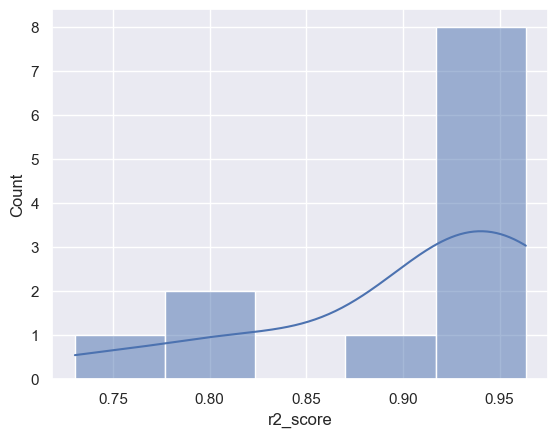

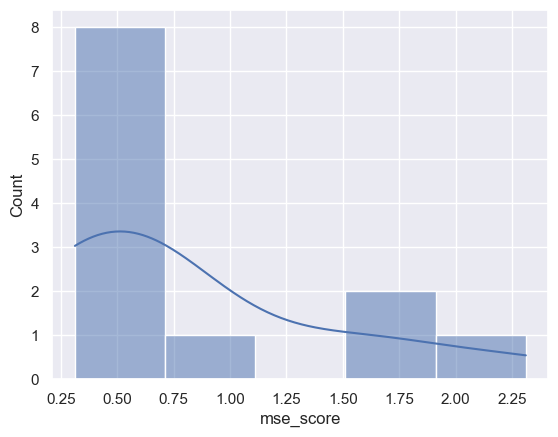

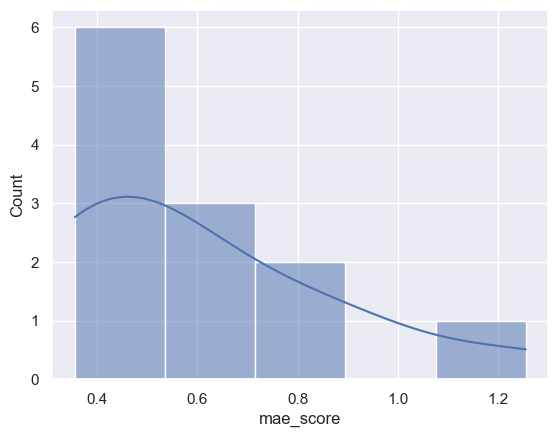

In [86]:
for i in data_df.columns:
    if i!="model_name":
        sns.histplot(data_df[i],kde=True)
        plt.show()

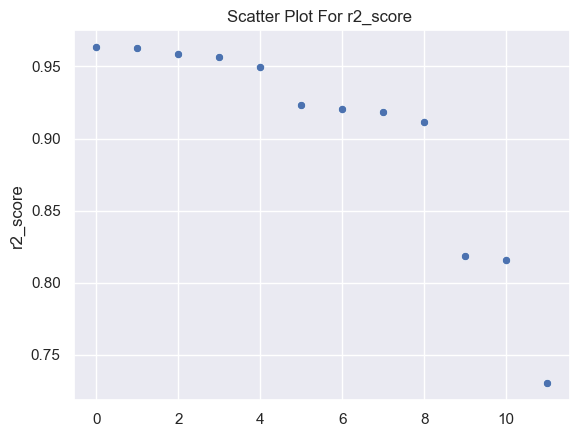

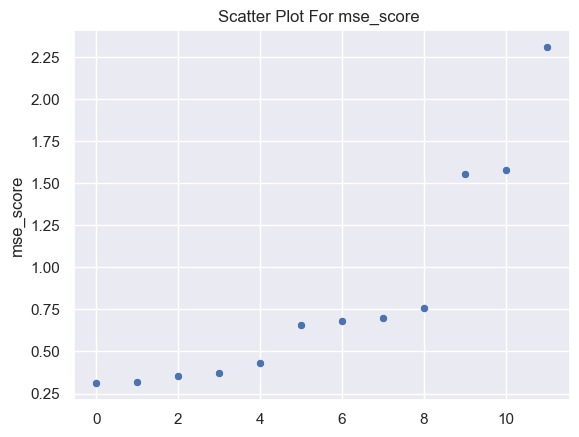

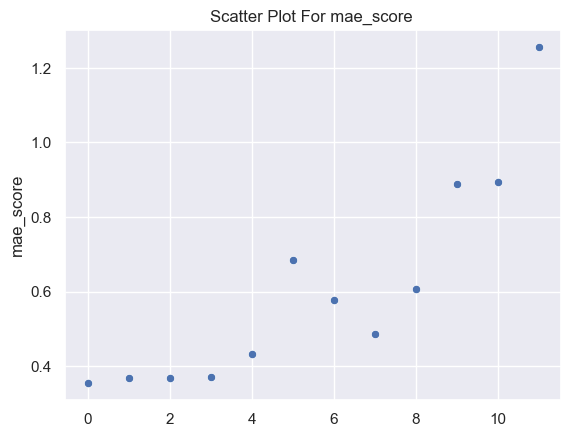

In [87]:
for i in data_df.columns:
    if i!="model_name":
        sns.scatterplot(data_df[i])
        plt.title(f"Scatter Plot For {i} ")
        plt.show()

In [88]:
sns.set_palette("Set3")

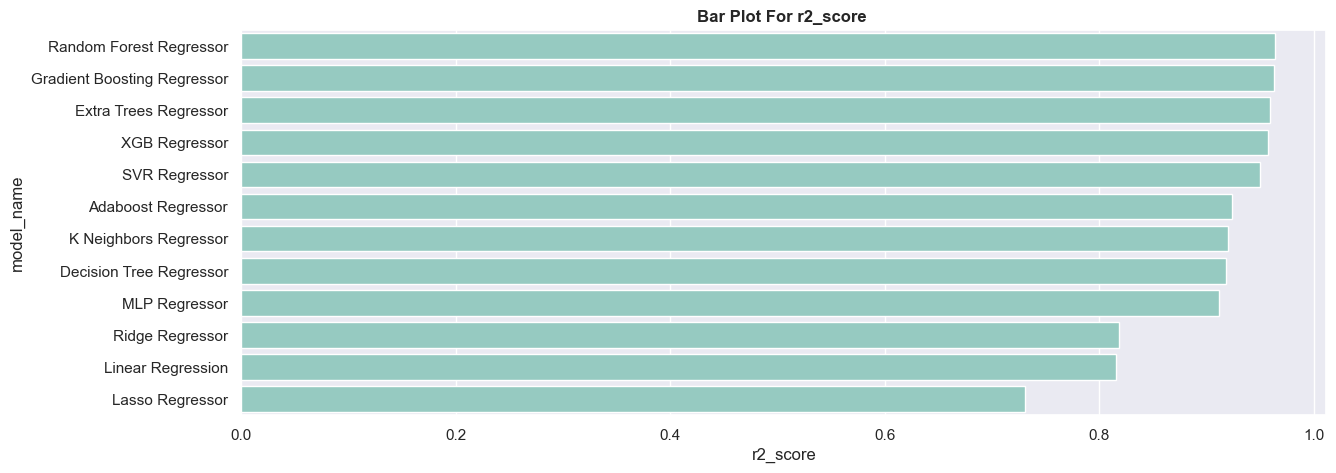

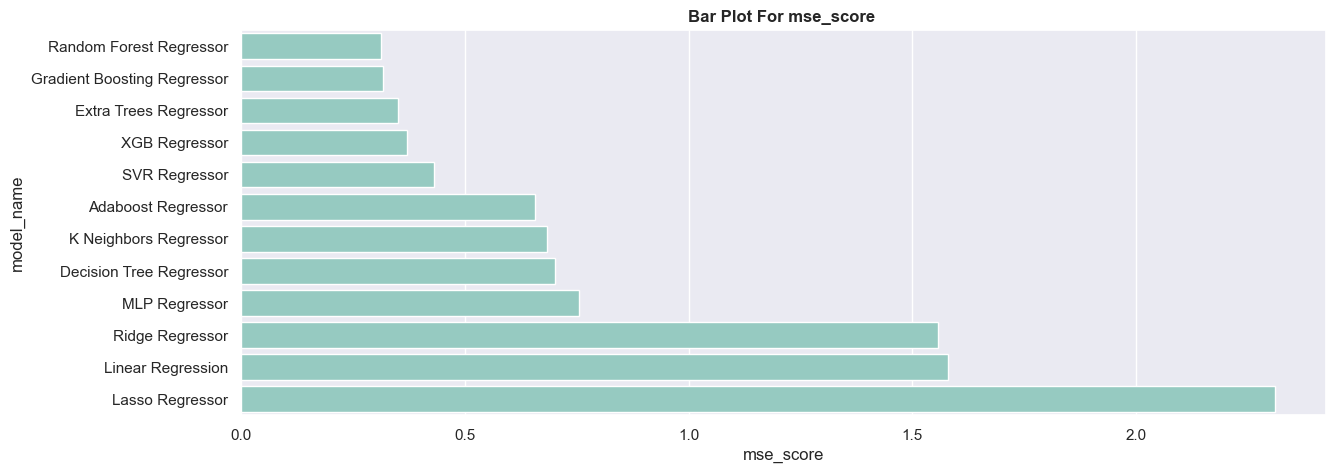

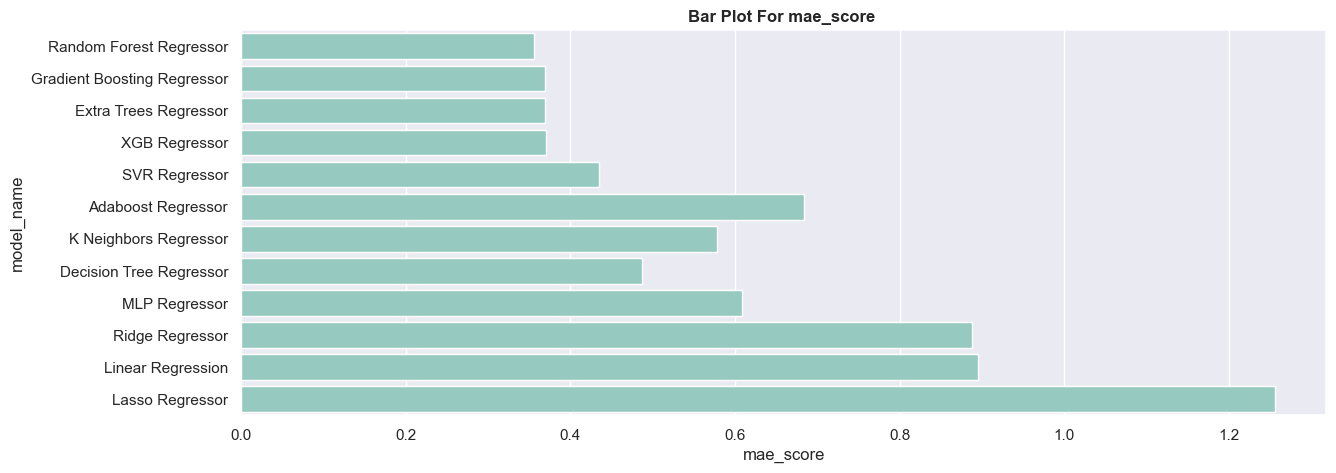

In [89]:
for i in data_df.columns:
    if i!="model_name":
        plt.figure(figsize=(14,5))
        sns.barplot(x=data_df[i],y=data_df["model_name"])
        plt.title(f"Bar Plot For {i} ", fontweight='bold')
        plt.show()

### Random Forest Is Best Model.So We are goint to import it as a pkl file

In [92]:
model_Pipeline_new=Pipeline(steps=[("standardScalar",ColumnTransformer(transformers=[
                                   ("Standard_Scalar",StandardScaler(),num_cols)
                                  ],remainder='passthrough')),
                               ("Model_Trainer",RandomForestRegressor())
                                  ]
                            )

In [93]:
X_train

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
298,11.00,87934,0,0,0,0,15
185,0.58,1900,0,1,1,0,16
216,4.43,12500,0,0,0,0,8
15,10.79,43000,1,0,0,0,8
272,10.00,27600,0,0,0,0,9
...,...,...,...,...,...,...,...
72,18.61,56001,0,0,0,0,11
256,13.60,49562,0,0,0,0,8
91,16.09,58242,1,0,0,0,10
43,8.06,45780,1,0,0,0,10


### Fiitting the Entire Dataset Now

In [97]:
model_Pipeline_new.fit(X,y)

Pipeline(steps=[('standardScalar',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Standard_Scalar',
                                                  StandardScaler(),
                                                  ['Present_Price',
                                                   'Kms_Driven', 'Age'])])),
                ('Model_Trainer', RandomForestRegressor())])

In [117]:
import pickle

### Exporting It

In [118]:
with open('car_price_predictor_model.pkl', 'wb') as file:
    pickle.dump(model_Pipeline_new, file)


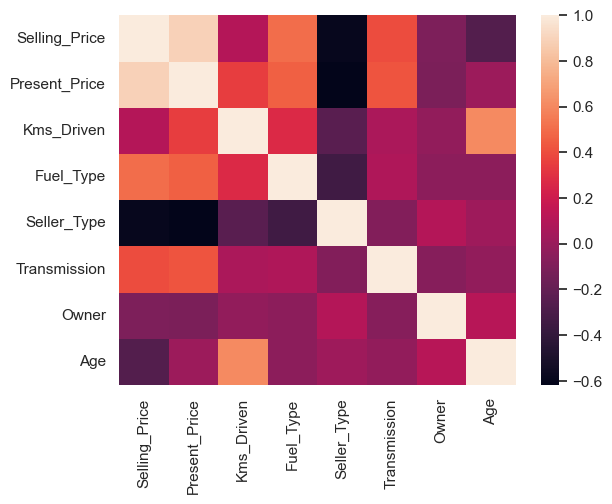

In [126]:
sns.heatmap(Car_df_Copy.corr())
plt.show()